**Mulitple Linear Regression
Problem Statement**

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

In [1501]:
## Bike Sharing case study
## Problem Statement
# A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



**Read Given CSV Day file**

In [1502]:
# Read Day CSV file
bike_day_data = pd.read_csv('day.csv',low_memory=False)
# Understanding the data
# Checking out for detailed info about the dataset
# Understand column and column type
bike_day_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1503]:
#reading the data
bike_day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [1504]:
# Get total count
bike_day_data.size

11680

In [1505]:
# check the size of the data
bike_day_data.shape

(730, 16)

In [1506]:
#get complete description about data
bike_day_data.describe() 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Checking for missing values**

In [1507]:
#checking for missing values
bike_day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Removing casual,registered,instant and dteday as cnt is sum of both column and thesse column have no use**

In [1508]:
# Removing casual and registered as cnt is sum of both column and thesse column have no use
bike_day_data.drop(['casual'],axis=1,inplace=True)
bike_day_data.drop(['registered'],axis=1,inplace=True)


In [1509]:
# dropping column instant as it is merely a index column which has no significance
bike_day_data.drop(['instant'],axis=1,inplace=True)


In [1510]:
# dropping column dteday as it is not useful as month and weekday are covering it
bike_day_data.drop(['dteday'],axis=1,inplace=True)


In [1511]:
# checking dataframe info after dropping the columns
bike_day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1512]:
# checking dataframe for 5 rows
bike_day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


**Renaming column to provide meaningful name**

In [1513]:
# renaming column to provide meaningful name

bike_day_data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [1514]:
# checking data correlation
bike_day_data.corr()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


**check for column having unique values**

In [1515]:
# check for column having unique values
bike_day_data.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
cnt           695
dtype: int64

**Analysis of data by plotting**

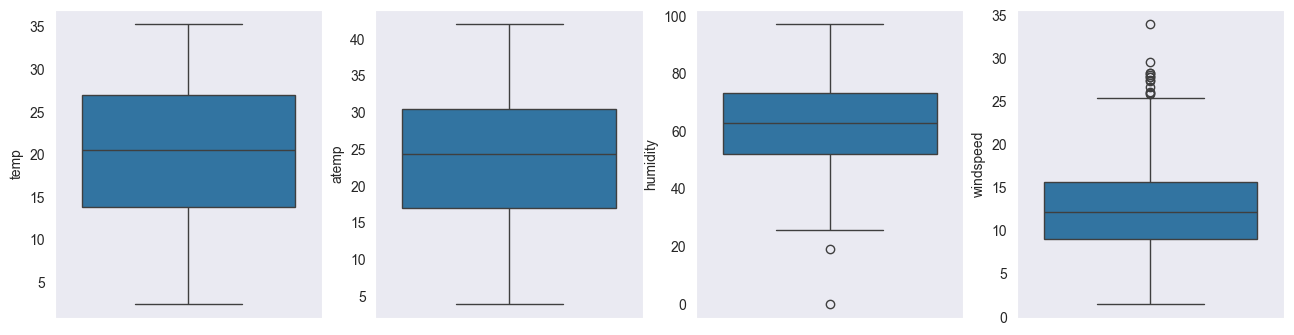

In [1516]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(20,4))

i = 1
for col in cols:
    plt.subplot(1,5,i)
    sns.boxplot(y=col, data=bike_day_data)
    i+=1

**Check for column having unique values**

In [1517]:
# Mapping the season column
bike_day_data.season = bike_day_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [1518]:
# Mapping the month column
bike_day_data.month = bike_day_data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [1519]:
# Mapping the weekday column
bike_day_data.weekday = bike_day_data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [1520]:
# Mapping the weathersit column
bike_day_data.weathersit = bike_day_data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [1521]:
bike_day_data

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


**pairplots to check for linear relationship**

<Figure size 1500x3000 with 0 Axes>

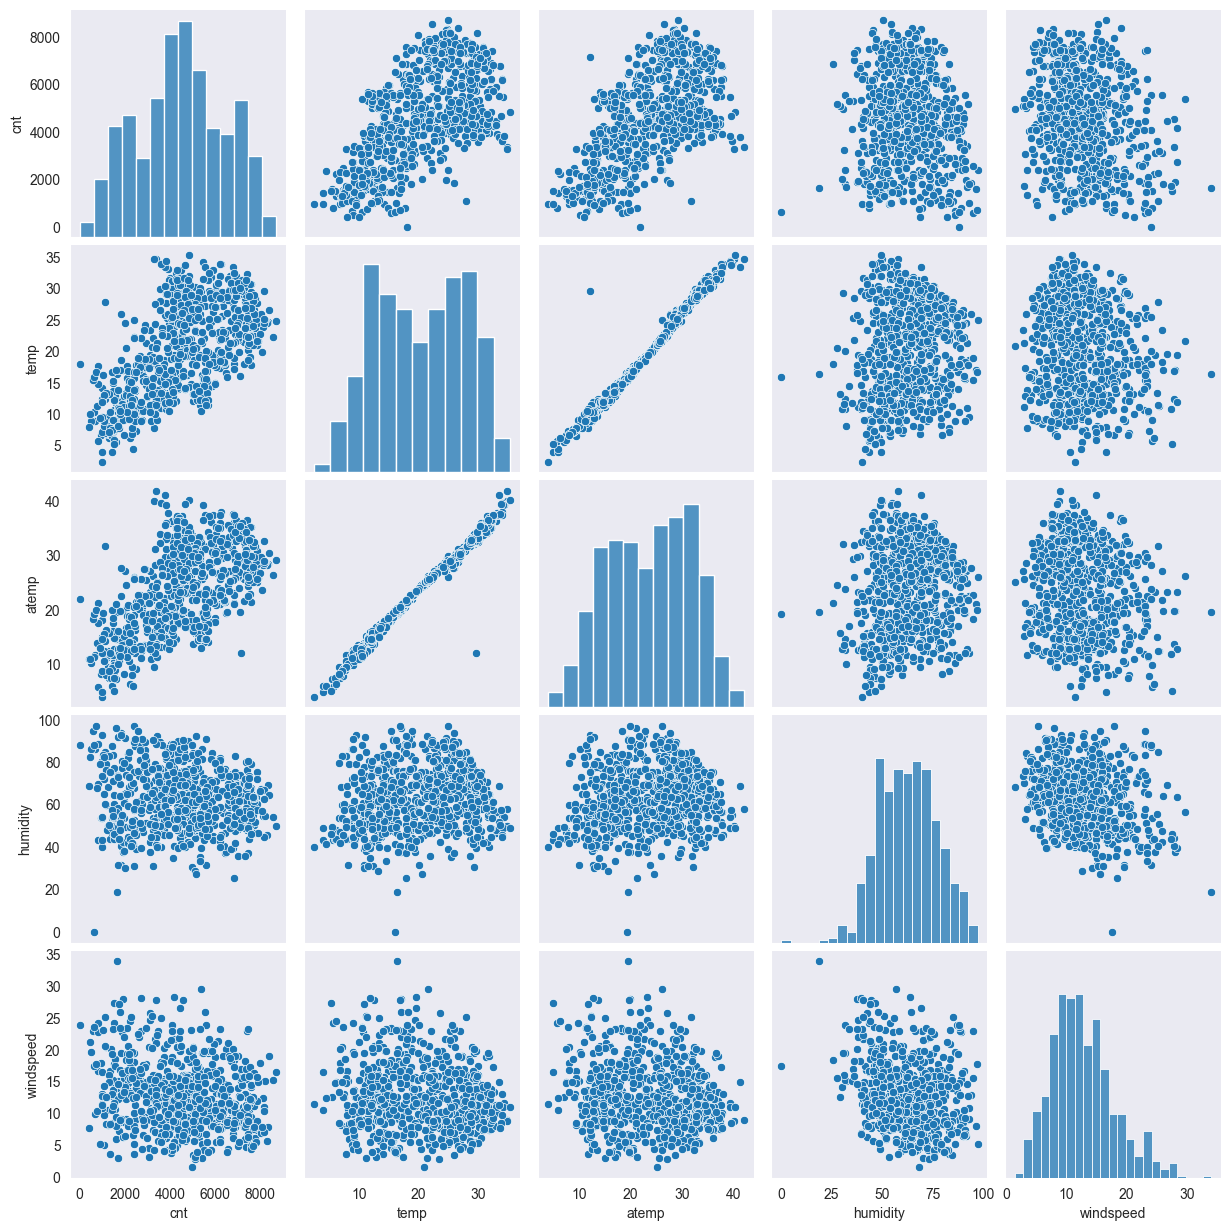

In [1522]:
plt.figure(figsize = (15,30),facecolor='c')
sns.pairplot(data=bike_day_data,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

**Univariate Analysis**

<Axes: xlabel='weathersit', ylabel='cnt'>

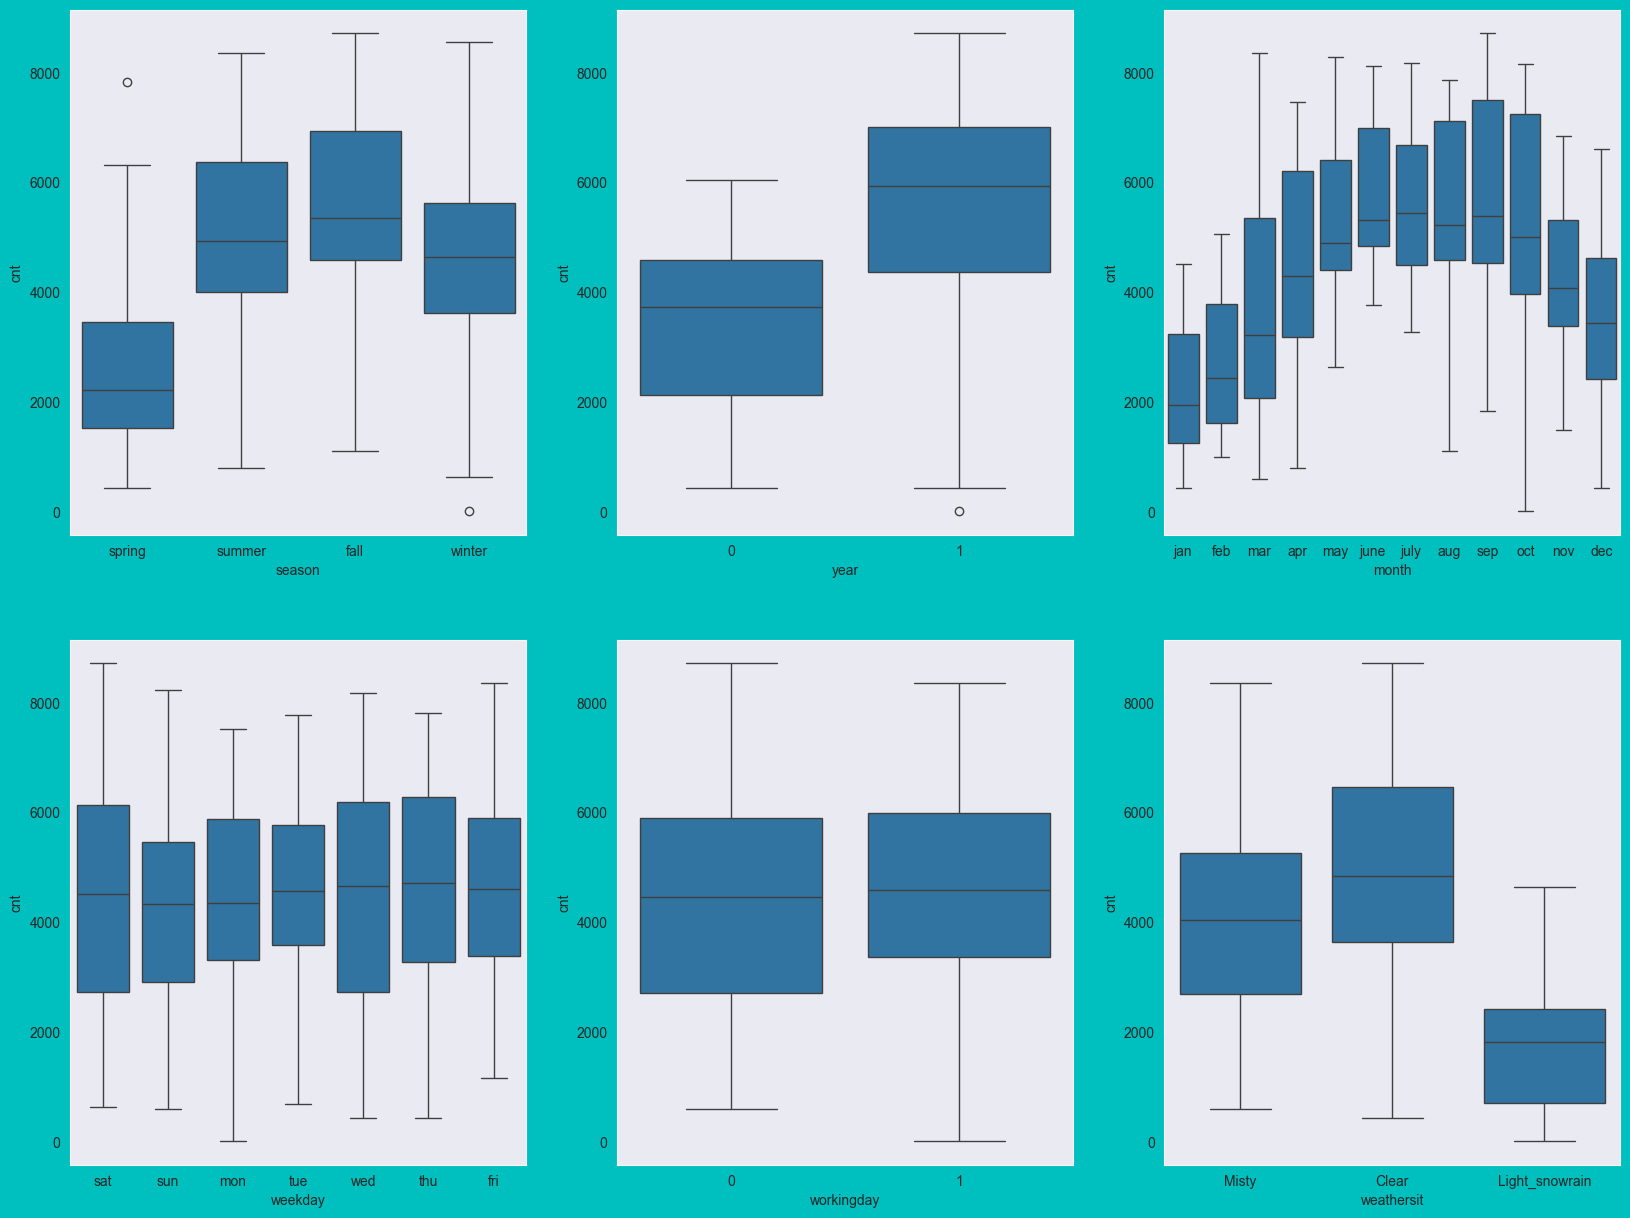

In [1523]:
# Univariate Analysis

plt.figure(figsize=(20,15),facecolor='c')
sns.set_style("dark")
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_day_data)

plt.subplot(2,3,2)
sns.boxplot(x='year',y='cnt',data=bike_day_data)

plt.subplot(2,3,3)
sns.boxplot(x='month',y='cnt',data=bike_day_data)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_day_data)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_day_data)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_day_data)

**Bivariate analysis**

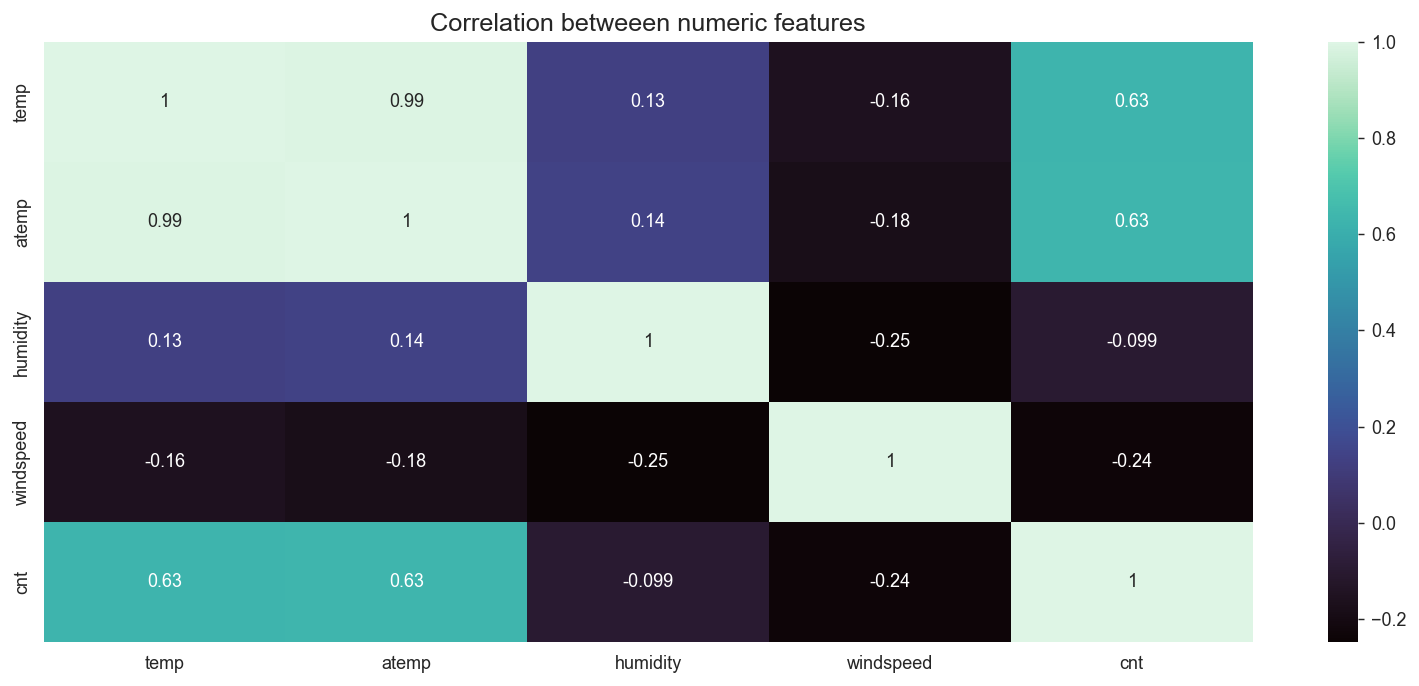

In [1524]:
# Bivariate analysis
num_features = ["temp","atemp","humidity","windspeed","cnt"]
plt.figure(figsize=(15,6),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=14)
sns.heatmap(bike_day_data[num_features].corr(),annot= True,cmap="mako")
plt.show()

In [1525]:
bike_day_data.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


**Dummy Variable creation**

In [1526]:
bike_day_data = pd.get_dummies(data=bike_day_data,columns=["season","month","weekday"],drop_first=True)
bike_day_data = pd.get_dummies(data=bike_day_data,columns=["weathersit"],drop_first=True)

In [1527]:
bike_day_data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,True,False,False


**Train Test split with 70:30 ratio**

In [1528]:
#y to contain only target variable
y=bike_day_data.pop('cnt')

#X is all remainign variable also our independent variables
X=bike_day_data

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1529]:
X.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [1530]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


**Scale continuous variables**

In [1531]:
# Scale continuous variables
num_vars = ['temp','atemp','humidity','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [1532]:
X_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1533]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
683,1,0,1,0.327133,0.322150,0.639330,0.327101,False,False,True,...,False,False,False,False,False,True,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,False,False,True,...,True,False,True,False,False,False,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,False,True,False,...,False,False,True,False,False,False,False,False,False,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,True,False,False,...,False,False,False,False,False,False,True,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,False,False,True,...,True,False,False,False,False,False,False,True,False,True


**Checking if the variables are highly correlated**

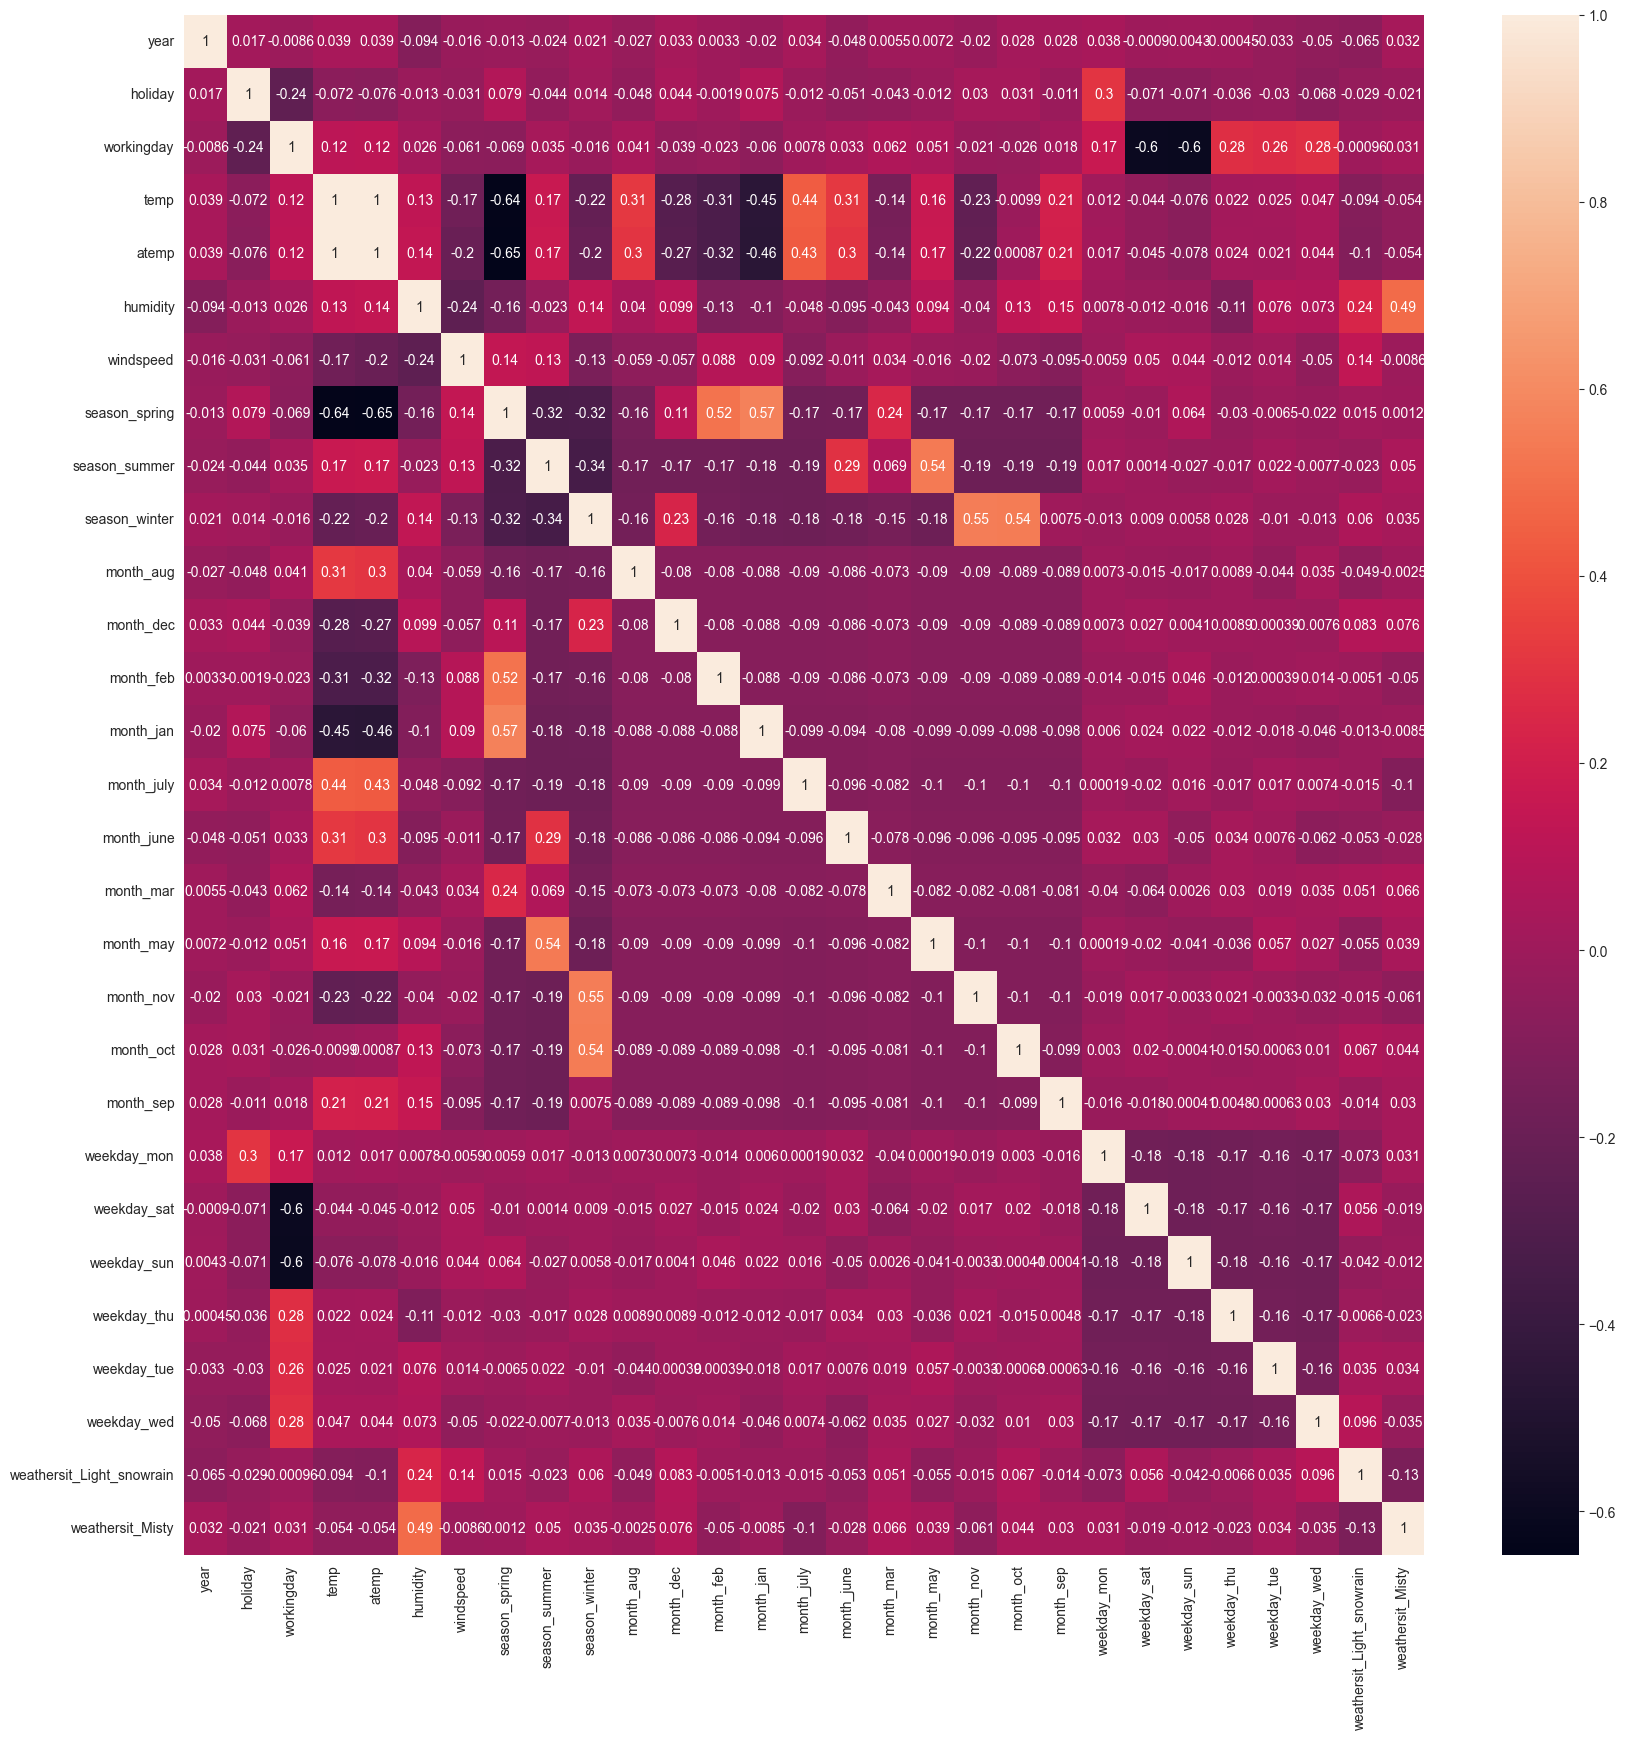

In [1534]:
#Checking if the variables are highly correlated
plt.figure(figsize = (20, 20))  
sns.heatmap(X_train.corr(), annot = True)
plt.show()

**LinearRegression**

In [1535]:
lr = LinearRegression()
lr.fit(X_train,y_train)
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [1536]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('month_aug', False, 7),
 ('month_dec', True, 1),
 ('month_feb', False, 8),
 ('month_jan', False, 13),
 ('month_july', False, 12),
 ('month_june', False, 14),
 ('month_mar', False, 2),
 ('month_may', False, 3),
 ('month_nov', True, 1),
 ('month_oct', False, 5),
 ('month_sep', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 11),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [1537]:
# 
#X_train_rfe=X_train_rfe.astype(float)
X_train = X_train.astype(float)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 683 to 102
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       511 non-null    float64
 1   holiday                    511 non-null    float64
 2   workingday                 511 non-null    float64
 3   temp                       511 non-null    float64
 4   atemp                      511 non-null    float64
 5   humidity                   511 non-null    float64
 6   windspeed                  511 non-null    float64
 7   season_spring              511 non-null    float64
 8   season_summer              511 non-null    float64
 9   season_winter              511 non-null    float64
 10  month_aug                  511 non-null    float64
 11  month_dec                  511 non-null    float64
 12  month_feb                  511 non-null    float64
 13  month_jan                  511 non-null    float64
 1

In [1538]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    #y_train = pd.Series([3,4,5]).astype('float64')
    #X_train_sm = pd.Series([3,4,5]).astype('float64')
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [1539]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed',
       'season_spring', 'season_winter', 'month_dec', 'month_nov', 'month_sep',
       'weekday_sat', 'weekday_sun', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [1540]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_jan', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Light_snowrain', 'weathersit_Misty']]

In [1541]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'month_aug', 'month_feb', 'month_jan',
       'month_july', 'month_june', 'month_mar', 'month_may', 'month_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [1542]:
X_train_rfe.shape

(511, 15)

**Model A - all columns selected by RFE**

In [1543]:
#Selected columns for Model A - all columns selected by RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols1 = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_jan', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Light_snowrain', 'weathersit_Misty']
build_model(cols1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]
vif.sort_values(by = 'VIF', ascending=False)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          4.52e-183
Time:                        23:38:38   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
4,humidity,27.40
3,temp,17.86
5,windspeed,5.70
2,workingday,5.16
6,season_spring,4.36
8,season_winter,3.22
7,season_summer,2.98
14,weathersit_Misty,2.22
0,year,2.10
12,weekday_sat,1.91


**Model B - Drop Jan insignificant as it has high p-value**

In [1544]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols2 = ['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Light_snowrain', 'weathersit_Misty']
build_model(cols2)
X_train_rfe = X_train_rfe.drop(['month_jan'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          3.59e-184
Time:                        23:38:39   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
4,humidity,26.96
3,temp,17.27
5,windspeed,5.68
2,workingday,5.15
6,season_spring,4.03
8,season_winter,3.20
7,season_summer,2.98
13,weathersit_Misty,2.21
0,year,2.10
11,weekday_sat,1.90


**Model C - Drop Humadity insignificant as it has negative coff**

In [1545]:
# Dropping the variable humidity as it has negative coefficient
cols3 = ['year', 'holiday', 'workingday', 'temp','windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Light_snowrain', 'weathersit_Misty']
build_model(cols3)
X_train_rfe = X_train_rfe.drop(['humidity'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.46e-181
Time:                        23:39:07   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
3,temp,8.28
4,windspeed,5.67
2,workingday,5.06
6,season_summer,2.62
5,season_spring,2.47
0,year,2.09
7,season_winter,2.07
10,weekday_sat,1.87
8,month_july,1.82
12,weathersit_Misty,1.57


**Model D- Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value**

In [1546]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols4 = ['year', 'workingday', 'temp','windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Light_snowrain', 'weathersit_Misty']
build_model(cols4)
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          4.56e-182
Time:                        23:39:07   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,temp,7.99
3,windspeed,5.67
1,workingday,4.53
5,season_summer,2.60
4,season_spring,2.35
0,year,2.09
6,season_winter,2.02
7,month_july,1.82
9,weekday_sat,1.76
11,weathersit_Misty,1.57


**Model E- Dropping the variable month_july as it has negative coefficient and is insignificant as it has high p-value**

In [1547]:
# Dropping the variable month_july as it has negative coefficient and is insignificant as it has high p-value
cols5 = ['year', 'workingday', 'temp','windspeed', 'season_spring','weekday_sun',
       'season_summer', 'season_winter','month_sep', 'weekday_sat',
       'weathersit_Light_snowrain', 'weathersit_Misty']
build_model(cols5)
X_train_rfe = X_train_rfe.drop(['month_july'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.8
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          5.37e-182
Time:                        23:39:08   Log-Likelihood:                -4141.9
No. Observations:                 511   AIC:                             8310.
Df Residuals:                     498   BIC:                             8365.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,temp,6.14
3,windspeed,5.67
1,workingday,4.52
4,season_spring,2.24
0,year,2.09
5,season_summer,2.07
6,season_winter,1.79
8,weekday_sat,1.76
10,weathersit_Misty,1.57
7,month_sep,1.25


In [1548]:
#Adding July and remove 'workingday','windspeed','season_summer','weekday_sat'
cols6 = ['year','season_spring', 'month_july','season_winter', 'month_sep', 'weekday_sun','weathersit_Light_snowrain', 'weathersit_Misty','temp']
build_model(cols6)
X_train_rfe = X_train_rfe.drop(['workingday','windspeed','season_summer','weekday_sat'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.33e-179
Time:                        23:39:09   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,temp,2.31
0,year,2.06
6,weathersit_Misty,1.51
3,season_winter,1.29
2,season_spring,1.22
4,month_sep,1.16
5,weathersit_Light_snowrain,1.05


In [1549]:
# 1Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [1550]:
# Building the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols6],y_train)
print(lr.intercept_,lr.coef_)

1849.3111141436207 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


**Residual Analysis**

In [1551]:
y_train_pred = lr.predict(X_train[cols6])

In [1552]:
# Ploting a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

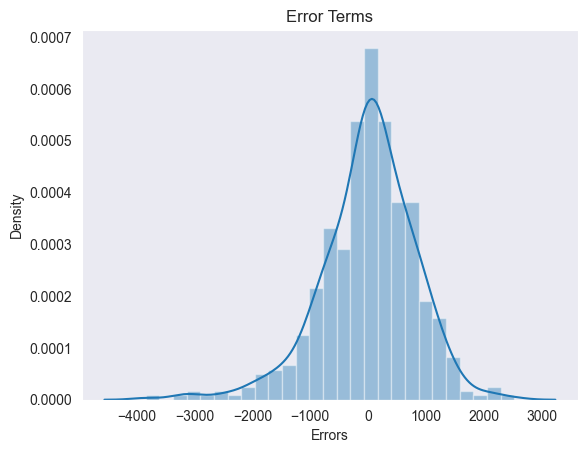

In [1553]:
plot_res_dist(y_train, y_train_pred)

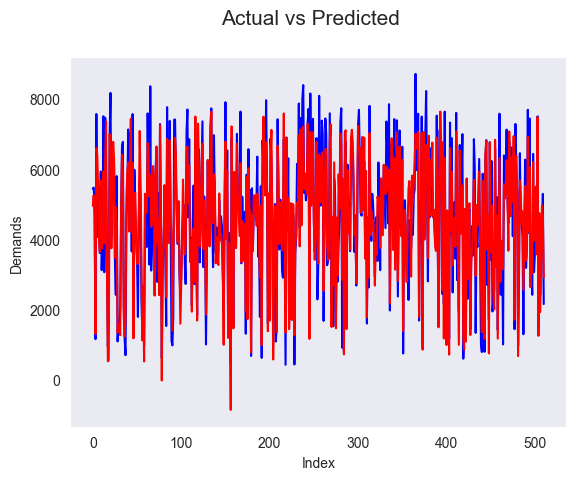

In [1554]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

**R-Squared value for train predictions**

In [1555]:
#Print R-squared Value
r2_score(y_train,y_train_pred)
#Scale variables in X_test
num_vars = ['temp','atemp','humidity','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [1556]:
cols7 = ['year','season_spring', 'month_july','season_winter', 'month_sep', 'weekday_sun','weathersit_Light_snowrain', 'weathersit_Misty','temp']
#Predicting test data values
y_test_pred = lr.predict(X_test[cols7])

**R-Squared value for test predictions**

In [1557]:
# Get R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8159036088393238

**Evaluating the model**

In [1558]:
# Evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8159036088393238

Text(0, 0.5, 'y_pred')

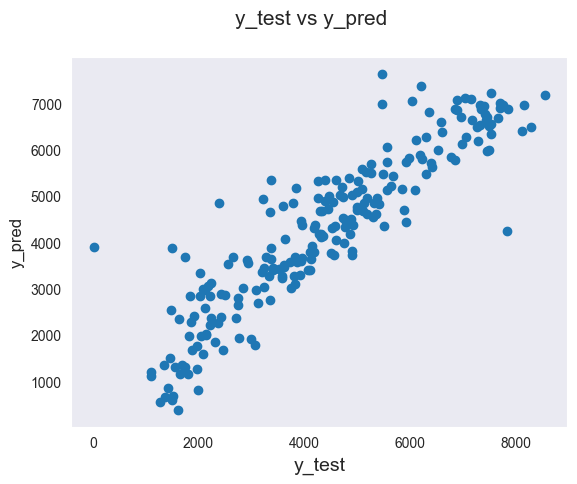

In [1559]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [1560]:
# Final model of manual + rfe approach using statsmodel to interpret it
cols7 = ['year','season_spring', 'month_july','season_winter', 'month_sep', 'weekday_sun','weathersit_Light_snowrain', 'weathersit_Misty','temp']

lm = build_model(cols7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.33e-179
Time:                        23:40:18   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Conclusion from the excersise- below are the variable which have impact on bike rent**
Humidity

holiday

temp

windspeed

Season

months(January, July, September, November, December)

Year

Sunday

weathersit( Light_Snowrain, Misty) + Cloud